# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal?
<li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

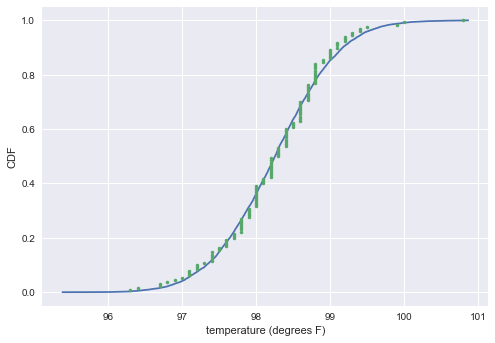

In [195]:
np.random.seed(7209)

# Computing the Theoretical CDF
temps = df.temperature
mean_temp = np.mean(temps)
std_temp = np.std(temps)
sample_temp = np.random.normal(mean_temp, std_temp, size=10000)
x_theor = np.sort(sample_temp)
y_theor = np.arange(1, len(x_theor) + 1) / len(x_theor)

# Computing the ECDF of the Observed Temperatures
x_obs = np.sort(temps)
y_obs = np.arange(1, len(x_obs) + 1) / len(x_obs)

# Plotting the Theoretical CDF and ECDF of Temperatures
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_obs, y_obs, marker = '.', linestyle = 'none')
_ = plt.xlabel('temperature (degrees F)')
_ = plt.ylabel('CDF')
plt.show()

The empirical cumulative distribution function for the data of body temperatures seems relatively close to that of the cumulative distribution function of a theoretically normal model of the data. For this reason, it is appropriate for us to approximate the distribution of body temperatures to be normal. 

# 2. Is the sample size large? Are the observations independent?
 <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [184]:
n_temp = len(temps)
print(n_temp)

130


Generally, we want a population size greater than 30 in order for the CLT to apply; this condition is fulfilled as there are 130 observations in the data. 

We have no reason to believe the observations are not independent from each other, especially since we are assuming that the data is normally distributed. 

# 3. Is the true population mean really 98.6 degrees F?
<li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

The p-value for the bootstrap hypothesis is 0.0
The p-value for the one-sample z-test is 4.35231516587e-08
The p-value for the one-sample t-test is 2.18874646241e-07


98.249230769230749

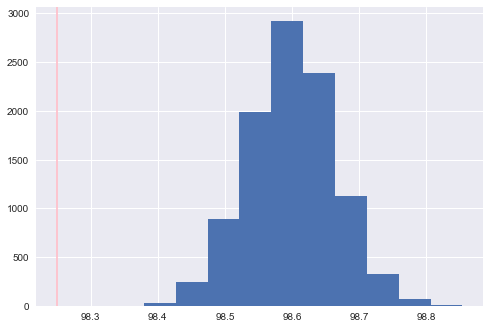

In [193]:
np.random.seed(7209)

# H0: The population mean body temperature is 98.6 degrees F
# HA: The population mean body temperature is not 98.6 degrees F

# One-sample bootstrap hypothesis test
translated_temps = temps - mean_temp + 98.6
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(translated_temps, len(translated_temps))
    bs_replicates[i] = np.mean(bs_sample)
#p_bs_test = (np.sum(bs_replicates <= mean_temp) + np.sum(-bs_replicates >= mean_temp)) / len(bs_replicates)
p_bs_test = np.sum(bs_replicates <= mean_temp) / len(bs_replicates)
print('The p-value for the bootstrap hypothesis is', p_bs_test)
_ = plt.hist(bs_replicates)
_ = plt.axvline(x=mean_temp, color='pink')

# z-statistic hypothesis test
z_temp = (mean_temp - 98.6) / (std_temp/ np.sqrt(n_temp))
p_z_test = 2 * st.norm.cdf(z_temp)
print('The p-value for the one-sample z-test is', p_z_test)

# t-statistic hypothesis test
t_temp = (mean_temp - 98.6) / (std_temp/np.sqrt(n_temp))
t_df = n_temp - 1
p_t_test = 2 * st.t.cdf(t_temp, df = t_df)
print('The p-value for the one-sample t-test is', p_t_test)
np.sum(bs_replicates >= -mean_temp)
mean_temp

Because we are only dealing with a single group of body temperatures, we would carry out one-sample hypothesis testing. Our sample size is greater than 30 and we are assuming the data is normally distributed, so it is appropriate to use an approximated z-statistic using the sample standard deviation, since we do not know the population standard deviation. 
When we try using a t-statistic, the p-value is greater than that of the z-test because the tails of the t-distribution are larger than that of the normal distribution.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
<li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

The correct test to use would be a hypothesis test using the t-statistic. The z-statistic underestimates the p-value because the data with sample size of 10 is not normally distributed, and is much less than the p-value calculated from the t-distribution. 

In [187]:
np.random.seed(7209)

temps_random_ten = np.random.choice(temps, 10)
mean_temp_ten = np.mean(temps_random_ten)
std_temp_ten = np.std(temps_random_ten)

# z-statistic hypothesis test
z_temp_ten = (mean_temp_ten - 98.6) / (std_temp_ten/10)
p_z_test_ten = 2 * st.norm.cdf(z_temp_ten)
print('The p-value for the one-sample z-test is', p_z_test_ten)

# t-statistic hypothesis test
t_temp_ten = (mean_temp_ten - 98.6) / (std_temp_ten/10)
t_df_ten = 10 - 1
p_t_test = 2 * st.t.cdf(t_temp_ten, df = t_df_ten)
print('The p-value for the one-sample t-test is', p_t_test)

The p-value for the one-sample z-test is 3.31012949729e-13
The p-value for the one-sample t-test is 4.65781908395e-05


# 5. At what temperature should we consider someone's temperature to be "abnormal"?
<li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [188]:
np.random.seed(7209)

# Assuming a 5% significance level, any temperature that has a p-value of 0.025 or less would be considered abnormal

#Abnormal body temperature according to bootstrap approach
bs_replicates_cf = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(temps, len(temps))
    bs_replicates_cf[i] = np.mean(bs_sample)
bs_cf = np.percentile(bs_replicates, [2.5, 97.5])
print('According to our bootstrap confidence interval, the lower limit for an abnormal body temperature is', bs_cf[0], 
      'and the upper limit is', bs_cf[1])

# Abnormal body temperature according to z-score
z_abnormal = st.norm.ppf(.975)
me_z_score = z_abnormal*(std_temp/np.sqrt(n_temp))
z_cf = (mean_temp - me_z_score, mean_temp + me_z_score)
print('According to our normally distributed confidence interval, the lower limit for an abnormal body temperature is', z_cf[0], 
      'and the upper limit is', z_cf[1])

# Abnormal body temperature according to t-value
t_abnormal = st.t.ppf(.975, df=t_df)
me_t_value = t_abnormal*(std_temp/np.sqrt(n_temp))
t_cf = (mean_temp - me_t_value, mean_temp + me_t_value)
print('According to our t-distributed confidence interval, the lower limit for an abnormal body temperature is', t_cf[0], 
      'and the upper limit is', t_cf[1])

According to our bootstrap confidence interval, the lower limit for an abnormal body temperature is 98.4707692308 and the upper limit is 98.7253846154
According to our normally distributed confidence interval, the lower limit for an abnormal body temperature is 98.1236821115 and the upper limit is 98.374779427
According to our t-distributed confidence interval, the lower limit for an abnormal body temperature is 98.1224931882 and the upper limit is 98.3759683502


# 6. Is there a significant difference between males and females in normal temperature?
<li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.

The p-value for the permutation test is 0.0234


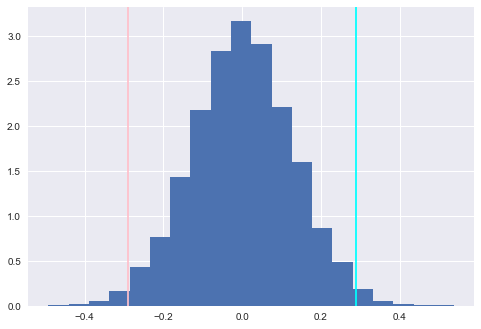

In [180]:
np.random.seed(7209)

# H0: The probability distributions of male and female body temperatures are the same
# HA: The probability distributions of male and female body temperatures are the different

male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']
mean_diff_gender = np.mean(male_temps) - np.mean(female_temps)

# Permutation test for the probability distributions of two samples using mean difference as test statistic
perm_reps = np.empty(10000)
for i in range(10000):
    perm_temps = np.random.permutation(temps)
    perm_temps_m = perm_temps[:len(male_temps)]
    perm_temps_f = perm_temps[len(female_temps):]
    perm_reps[i] = np.mean(perm_temps_m) - np.mean(perm_temps_f)
_=plt.hist(perm_reps, bins=20, normed=True)
_=plt.axvline(x=mean_diff_gender, color='pink')
_=plt.axvline(x=-mean_diff_gender, color='cyan')
p_perm = np.sum(abs(perm_reps) >= abs(mean_diff_gender))/len(perm_reps)
print('The p-value for the permutation test is', p_perm)

I used a permutation test for equivalence of probability distributions because I was interested in seeing if the data between male and female body temperatures came from the same distribution; if the two groups do not have equal distributions, it could explain why the p-vales of previous tests were so low. 

From the hypothesis test, we got the result that there is a 2.34% chance that we would obtain a difference in mean that is at least as extreme as this, assuming that the distributions of body temperature of males and females were the same. Given a 5% significance level, our test would suggest there is a statistically significant difference between male and female body temperatures; however, because the p-value is large enough to fail to reject the null hypothesis at 1% significance, we cannot say our test has strong statistical significance. 

The relatively low p-value for our test for the difference in means may explain why our previous hypothesis tests for the population mean of body temperature being 98.6 F had such low p-values; the means of the two genders were not the same meaning the variability within the groups were affecting the overall sample mean. 

In [200]:
np.random.seed(7209)

# Bootstrap hypothesis test for difference in means
male_temps_shifted = male_temps - np.mean(male_temps) + mean_temp
female_temps_shifted = female_temps - np.mean(female_temps) + mean_temp
bs_reps_male = np.empty(10000)
bs_reps_female = np.empty(10000)
for i in range(10000):
    bs_sample_male = np.random.choice(male_temps_shifted, len(male_temps_shifted))
    bs_reps_male[i] = np.mean(bs_sample_male)
    bs_sample_female = np.random.choice(female_temps_shifted, len(female_temps_shifted))
    bs_reps_female[i] = np.mean(bs_sample_female)
bs_reps_diff = bs_reps_male - bs_reps_female
p_bs_diff = np.sum(bs_reps_diff <= mean_diff_gender)/len(bs_reps_diff)
print('The p-value for the two-sample bootstrap hypothesis test for the difference in means is', p_bs_diff)

The p-value for the two-sample bootstrap hypothesis test for the difference in means is 0.0113
